In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
db_1 = pd.read_csv('02-14-2018.csv')

In [15]:
db_2 = pd.read_csv('02-15-2018.csv')

In [2]:
db_3 = pd.read_csv('02-16-2018.csv')

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
db_4 = pd.read_csv('02-20-2018.csv')

In [18]:
db_5 = pd.read_csv('02-21-2018.csv')

In [26]:
db_6 = pd.read_csv('02-22-2018.csv')

In [ ]:
db_7 = pd.read_csv('02-23-2018.csv')

In [ ]:
db_8 = pd.read_csv('02-28-2018.csv')

In [ ]:
db_9 = pd.read_csv('03-01-2018.csv')

In [ ]:
db_10 = pd.read_csv('03-02-2018.csv')

In [28]:
db_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [39]:
print('Размер db_1:', db_1.shape)
print('Размер db_2:', db_2.shape)

Размер db_1: (1048575, 80)
Размер db_2: (1048575, 80)


In [60]:
%time
db_1_2 = db_1.merge(db_2, how='outer')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [46]:
db_1.merge?

In [49]:
db_1_2.shape

(2097150, 80)

In [61]:
db_1_2 = db_1_2[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts']]

In [62]:
db_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 7 columns):
 #   Column           Dtype
---  ------           -----
 0   Dst Port         int64
 1   Protocol         int64
 2   Flow Duration    int64
 3   Tot Fwd Pkts     int64
 4   Tot Bwd Pkts     int64
 5   TotLen Fwd Pkts  int64
 6   TotLen Bwd Pkts  int64
dtypes: int64(7)
memory usage: 128.0 MB


### Имеет смысл проанализированить отдельно каждый дота сет и взять оттуда отдельные признаки, затем объединить в один дата сет
#### Так как при использовании 7 признаков из 80 вес сократился в 10 раз

In [63]:
db_1_2['Protocol'].unique()

array([ 0,  6, 17])

In [64]:
db_1_2.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts
0,0,0,112641719,3,0,0,0
1,0,0,112641466,3,0,0,0
2,0,0,112638623,3,0,0,0
3,22,6,6453966,15,10,1239,2273
4,22,6,8804066,14,11,1143,2209


In [78]:
categories = {}
for key, value in enumerate(db_1['Label'].unique()):
    categories[value] = key + 1
    
db_1['Category_Label'] = db_1['Label'].map(categories)

In [146]:
db_1['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

<AxesSubplot:>

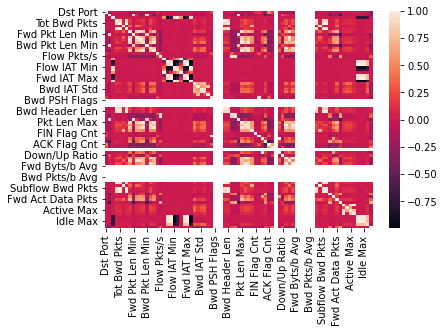

In [82]:
sns.heatmap(db_1.corr())

In [96]:
corr = db_1.corr()

In [115]:
corr['Category_Label'].head()

Dst Port        -0.234100
Protocol        -0.329080
Flow Duration   -0.003390
Tot Fwd Pkts     0.029281
Tot Bwd Pkts     0.003248
Name: Category_Label, dtype: float64

In [126]:
db_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Category_Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,1
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,1
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,1
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Benign,1
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Benign,1


<AxesSubplot:>

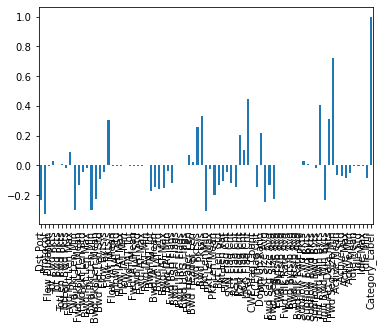

In [145]:
corr['Category_Label'].plot.bar()

#### Для первичной выборки признаков можно воспользоваться такблицей кореляции, далее можно восмользоваться <a href = 'https://habr.com/ru/post/550978/'>методом выбора признаков для модели случайного леса </a>


In [125]:
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

In [135]:
# зафиксируем значение генератора случайных чисел для воспроизводимости 
SEED = 1

def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(data, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
        
    else:
        raise KeyError('Unknown model_type')

        
def grid_search(model, gs_params):
    '''Функция для подбора гиперпараметров с помощью перекрёстной проверки'''
     
    gs = GridSearchCV(estimator=model, param_grid=gs_params, refit=True,
                      scoring='roc_auc', n_jobs=-1, cv=skf, verbose=0)
    gs.fit(X, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(5)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    return gs
        
# оставим только численые признаки
X = db_1.select_dtypes(exclude=['object']).copy()
y = db_1['Category_Label']

In [136]:
rf = Pipeline([('rf', RandomForestClassifier(n_jobs=-1, 
                                             class_weight='balanced', 
                                             random_state=SEED))])
# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

scores = cross_val_score(estimator=rf, X=X, y=y, 
                         cv=skf, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/macbook/opt/anaconda3/lib/python3.9/site-package

scores = [nan nan nan nan nan] 
mean score = nan +/- nan


In [134]:
plot_features_scores(model=rf, data=X, target=y, column_names=X.columns, model_type='rf')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').